In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install gensim

In [3]:
import gensim
import os

In [5]:
import os
import re
from gensim.utils import simple_preprocess

story = []

def split_sentences(text):
    return re.split(r'[.!?]\s+|\n+', text)

for filename in os.listdir():
    if filename.endswith('ssb.txt'):
        with open(filename, 'r', encoding='utf-8-sig', errors='ignore') as f:
            corpus = f.read()
            raw_sent = split_sentences(corpus)
            for sent in raw_sent:
                if sent.strip():
                    story.append(simple_preprocess(sent))

print(story[:5])


[['game', 'of', 'thrones'], ['book', 'one', 'of', 'song', 'of', 'ice', 'and', 'fire'], ['by', 'george'], [], ['martin']]


In [6]:
story

[['game', 'of', 'thrones'],
 ['book', 'one', 'of', 'song', 'of', 'ice', 'and', 'fire'],
 ['by', 'george'],
 [],
 ['martin'],
 ['prologue'],
 ['we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are'],
 ['dead'],
 ['do',
  'the',
  'dead',
  'frighten',
  'you',
  'ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead', 'royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',
  '

In [7]:
model=gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [8]:
model.build_vocab(story)

In [9]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(6574921, 8625265)

In [11]:
model.wv.most_similar('daenerys')

[('myrcella', 0.7409024238586426),
 ('margaery', 0.7330219745635986),
 ('viserys', 0.7261878848075867),
 ('princess', 0.7116690278053284),
 ('queen', 0.7107873558998108),
 ('elia', 0.7019100785255432),
 ('targaryen', 0.7016551494598389),
 ('rhaegar', 0.6812241077423096),
 ('stormborn', 0.6692795753479004),
 ('tommen', 0.664603590965271)]

In [12]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [13]:
model.wv.doesnt_match(['cersei','jaime','bronn','tyrion'])

'bronn'

In [14]:
model.wv['king']

array([ 2.8800066 ,  0.803303  , -0.63629884, -2.7870347 , -0.97962004,
        2.4100072 ,  2.517693  ,  0.34102494,  0.9700474 ,  1.0716727 ,
       -1.6221361 , -0.19376354, -1.1845624 , -0.53568083, -0.45909968,
       -0.5463487 ,  2.4019816 , -1.3305922 , -3.6250598 , -0.46350628,
        1.8379711 ,  1.6281605 ,  0.23343655, -0.64921516,  1.0304462 ,
        0.20642827, -1.1705221 , -1.1264845 , -0.3097156 ,  1.197269  ,
       -0.7036054 ,  1.9637897 , -1.4606094 , -1.9421873 ,  1.7849914 ,
        0.30154976,  1.556136  , -0.02794303, -1.3337723 , -0.07137419,
       -1.3691844 , -1.318972  ,  1.084466  ,  2.1560519 ,  1.0939672 ,
       -2.080646  ,  0.97621423,  1.5031335 ,  1.3448495 ,  0.8876367 ,
       -1.7285477 , -0.45636556,  0.7518697 , -2.102172  , -3.0128782 ,
        0.5196588 , -0.46983543,  0.6271414 ,  1.1200751 ,  2.006617  ,
        1.3639281 ,  0.10474034,  0.79576594,  1.0642117 ,  1.9798747 ,
        1.6698742 , -0.1839162 ,  1.5890101 , -0.8856686 ,  0.53

In [15]:
model.wv['king'].shape

(100,)

In [16]:
model.wv.similarity('cersei','sansa')

0.8090339

In [17]:
model.wv.similarity('arya','sansa')

0.8924843

In [18]:
model.wv.similarity('tywin','sansa')

0.2667747

In [19]:
model.wv.get_normed_vectors()

array([[ 0.04638491, -0.09939644, -0.00490797, ..., -0.06180403,
        -0.11717691,  0.1306061 ],
       [-0.05167395, -0.02494713, -0.03010756, ..., -0.04746648,
        -0.07395132,  0.15941149],
       [-0.00735999, -0.2125731 , -0.0759512 , ..., -0.00356722,
         0.22009438, -0.1808696 ],
       ...,
       [-0.04120222,  0.2006523 , -0.03336812, ...,  0.04704849,
         0.13095038, -0.05384318],
       [ 0.02196626,  0.10678311,  0.04041537, ..., -0.014129  ,
         0.06136711, -0.00208346],
       [-0.04517956,  0.04107224,  0.04012021, ..., -0.0143255 ,
         0.06292692, -0.00127487]], dtype=float32)

In [20]:
model.wv.get_normed_vectors().shape

(17869, 100)

In [21]:
y=model.wv.index_to_key

In [22]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'them',
 'lord',
 'no',
 'from',
 'were',
 'would',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'could',
 'are',
 'we',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'king',
 'who',
 'well',
 'down',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'old',
 'hand',
 'even',
 'too',
 'before',
 'never',
 'tyrion',
 'off',
 'an',
 'see',
 'know',
 'into',
 'made',
 'father',
 'now',
 'eyes',
 'black',
 'told',
 'thought',
 'lady',
 'time',
 'then',
 'how',
 'long',
 'has',
 'might',
 'us',
 'come',
 'where',
 'here',
 'can',
 'through',
 'still',
 'face',
 'head',
 'red',
 'way',
 'page',
 'boy',
 'must',
 'once',
 'good',
 'two',
 'over',
 'little',
 'about',
 'brother'

In [26]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   ------- -------------------------------- 2.1/10.7 MB 7.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.7 MB 8.7 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 9.8 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- -------

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=3)

In [30]:
x=pca.fit_transform(model.wv.get_normed_vectors())

In [31]:
x[:5]

array([[ 0.1712265 ,  0.5912925 , -0.14180583],
       [ 0.19839683,  0.3710967 ,  0.0237647 ],
       [-0.2956276 ,  0.64844626,  0.08814286],
       [ 0.04212843,  0.3710202 , -0.1271187 ],
       [-0.15450785,  0.6296854 ,  0.09049084]], dtype=float32)

In [32]:
x.shape

(17869, 3)

In [35]:
!pip install plotly


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 12.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 14.3 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ------------------------------

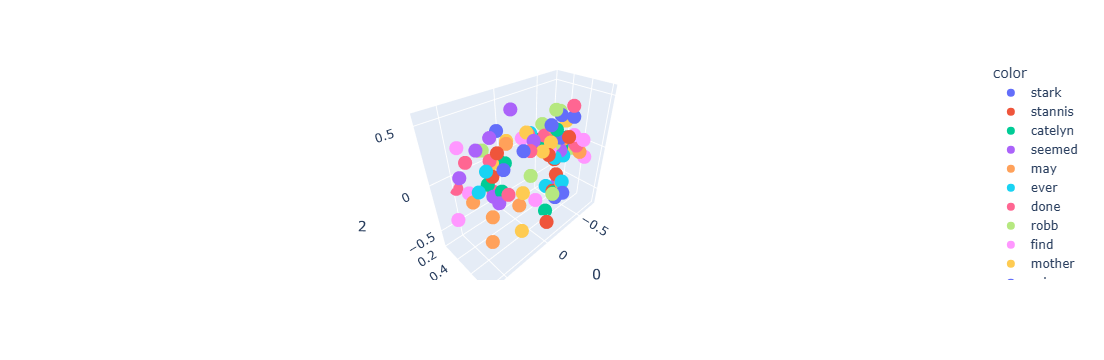

In [42]:
import plotly.express as px  
fig=px.scatter_3d(x[200:300],x=0,y=1,z=2,color=y[200:300])
fig.show()